# Task 2

В этом упражнении вы будете реализовывать линейную регрессию с одной
переменной, чтобы предсказать прибыль для продовольственного грузовика. Предположим, вы являетесь генеральным директором сети ресторанов с франшизой и хотите понять, где открыть новые заведения. Сеть ресторанов уже имеет грузовики в разных городах, и у вас есть данные о прибыли населения в городах.
Вы хотели бы использовать эти данные, чтобы помочь вам выбрать, на какой город расшириться в ближайшем будущем.

Файл "ex1data1.csv" содержит набор данных для нашей задачи линейной регрессии. 

Первый столбец - население города в 10 000 людей, то есть значение в данной колонке 17.592 означает, что в городе живёт 6.1101 * 10000 = 61 101 людей.

Второй столбец - средняя прибыль продовольственного грузовика в месяц в этом городе в $1000 , то есть 17.592 * 1000 = $17 592 прибыли. Отрицательное значение для прибыли указывает на потери в этом городе, то есть еды привезли больше, чем продали в ресторане.

Задача похожа на ту, что мы разбирали на лекции, только с дополнениями.

Можно перенести необходимый код из лекционного ноутбука в отдельный .py файл или несколько и импортировать оттуда либо просто скопировать в новый ноутбук.

Что предстоит сделать:

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

1. Считать данные в pandas dataframe (1 балл).

In [12]:
data = pd.read_csv('ex1data1.csv')
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


2. Построить scatter plot зависимости прибыли от кол-ва людей в городе (1 балл).

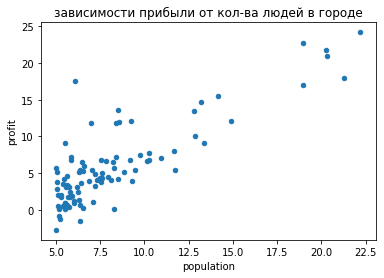

In [13]:
data.plot(kind='scatter', x='population', y='profit', title='зависимости прибыли от кол-ва людей в городе');

3. Найти матрицу Х и вектор у. Нормализировать данные. Добавить колонку единичек к матрице Х (1 балл).

X <class 'numpy.ndarray'> (97, 2) [[0.06306437 1.        ]]
y <class 'numpy.ndarray'> (97, 1) [[0.75566299]]


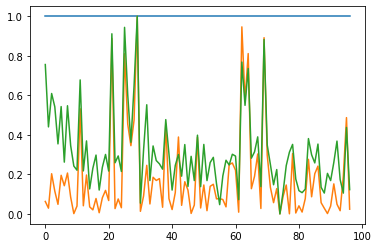

In [237]:

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(data)

ones = np.array([1]*len(scaled)).reshape(-1,1)

scaled = np.hstack((ones, scaled))

X = scaled[:,[1,0]]
y = scaled[:,[2]].reshape((-1,1))

print('X',type(X),X.shape, X[:1])
print('y', type(y), y.shape, y[:1])

plt.plot(scaled)

4. Написать снова или найти в лекционном ноутбуке фукнции mserror, linear_prediction в матричной форме (то есть НЕ через циклы) (1 балл)

In [207]:
def linear_prediction(X, theta): 
    return np.dot(X, theta) 


def mserror(y, y_pred):
    return np.mean((y-y_pred)**2)

# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
    lp = linear_prediction(X, theta) 
    grad = np.dot(X.transpose(), (lp - y)) 
    return grad 
  
# function to compute the error for current values of theta 
def cost(X, y, theta): 
    lp = linear_prediction(X, theta) 
    J = np.dot((lp - y).transpose(), (lp - y)) 
    J /= 2
    return J[0] 


#https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

5. Найти коэффициенты линейной модели методами:
    1. Full batch gradient descent (5 баллов если коэффициенты получатся правильные)

In [294]:
# function to perform full-batch gradient descent 
def fb_gradientDescent(X, y, learning_rate, max_iters): 
    theta = np.zeros((X.shape[1], 1))
    error_list = [] 
    iter_num = 0
    while iter_num < max_iters:
        theta = theta-gradient(X, y, theta)*learning_rate
        error_list.append(cost(X, y, theta))
        iter_num += 1
    return theta, error_list

Error 0.29762223699077617
W [[0.76323222]
 [0.17836893]]


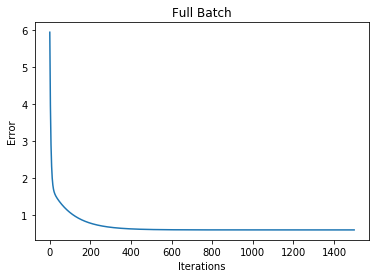

Wall time: 138 ms


In [329]:
%%time

fb_X = X
fb_y = y

fb_theta, fb_error_list = fb_gradientDescent(fb_X, fb_y, 1e-3, 15e2) 

print('Error', mserror(fb_y, np.asarray(fb_error_list).reshape(-1)))
print('W', fb_theta)

plt.plot(range(len(fb_error_list)), fb_error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Full Batch')
plt.show()

2. Mini batch gradient descent с размером батча 32 (5 баллов если коэффициенты получатся правильные)

In [291]:
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
# function to perform mini-batch gradient descent 
def mb_gradientDescent(X, y, learning_rate, batch_size, max_iters): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    iter_num = 0
    while iter_num < max_iters:
        mini_batches = create_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(cost(X_mini, y_mini, theta)) 
            iter_num += 1
    return theta, error_list 

Error 0.11496534251410831
W [[0.59469791]
 [0.21064584]]


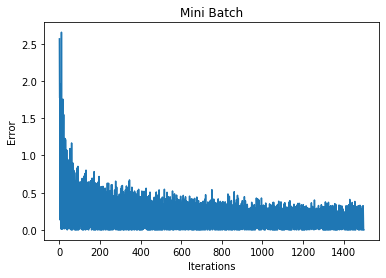

Wall time: 177 ms


In [328]:
%%time

mb_X = X
mb_y = y

mb_theta, mb_error_list = mb_gradientDescent(mb_X, mb_y, 1e-3, 32, 15e2) 

print('Error', mserror(mb_y, np.asarray(mb_error_list).reshape(-1)))
print('W', mb_theta)

plt.plot(range(len(mb_error_list)), mb_error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Mini Batch')
plt.show()

3. Stochastic gradient descent (1 балл если коэффициенты получатся правильные - потому что это уже делали на лекции)

In [264]:
def stochastic_gradient_step(X, y, theta, train_ind, alpha=0.01):
    return theta + alpha / X.shape[0] * X[train_ind] * (y[train_ind] - linear_prediction(X[train_ind], theta))

def stochastic_gradient_descent(X, y, theta_init, alpha=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    weight_dist = np.inf
    theta = theta_init
    errors = []
    iter_num = 0
    np.random.seed(seed)

    while weight_dist > min_weight_dist and iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        theta_new = stochastic_gradient_step(X, y, theta, random_ind, alpha)
        weight_dist = np.linalg.norm(theta - theta_new)
        theta = theta_new
        errors.append(mserror(y, linear_prediction(X, theta)))
        iter_num += 1
    return theta, errors

Error 0.07782474910076478
W [0.01389087 0.04578391]


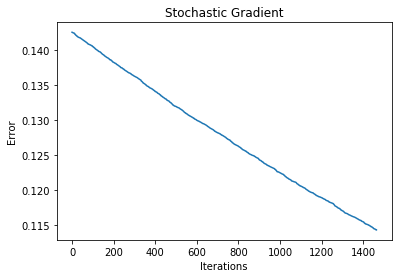

Wall time: 201 ms


In [327]:
%%time

sgd_X = X
sgd_y = y

stoch_grad_desc_weights, stoch_errors_by_iter = \
            stochastic_gradient_descent(sgd_X, \
                                        sgd_y, \
                                        np.zeros(sgd_X.shape[1]) \
                                        ,max_iter=15e2)

print('Error', mserror(sgd_y, \
                       np.asarray(stoch_errors_by_iter).reshape(-1)))
print('W', stoch_grad_desc_weights)


plt.plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Stochastic Gradient')
plt.show()

In [350]:
from sklearn.linear_model import LinearRegression
sk_X = X
sk_y = y

reg = LinearRegression(normalize=True, n_jobs=15e2).fit(sk_X, sk_y)


print('Error', reg.score(sk_X, sk_y)) 
print('W', reg.coef_)

print(pl_data)
#plt.plot(range(len(pl_data)), pl_data)
#plt.xlabel('Iterations')
#plt.ylabel('Error')
#plt.title('sklearn LinearRegression')
#plt.show()


Error 0.70203155378414
W [[0.7638249 0.       ]]
0.012440774864962551


Для каждого метода (кол-во баллов - за правильную реализацию для каждого из трёх методов):

- самостоятельно выбрать количество эпох, обосновать выбор (1 балл). Количество эпох для разных моделей может быть разным, а может быть одинаковым. Кол-во эпох можно выбирать из соображений времени на обучение (видим, что одна итерация занимает 2 секунды и понимаетм, что 10к итераций займут слишком много времени - значит надо бы поставить поменьше) или когда ошибка начинает меняться слишком незначительно, к примеру.

- вывести график ошибки в процессе обучения с подписями осей абсцисс и ординат  (1 балл)

 - измерить время обучения и провести анализ, какой из методов работает быстрее (5 баллов)

- вывести в ноутбуке полученные в результате применения метода коэффициенты (2 балла)

- вывести ошибку финальной модели (2 балла)

6. Построить аналогичную предыдущим модель с использованием sklearn.linear_model.LinearRegression . Подумать, какие данные подать на вход и исходя из документации, какие параметры обучения выбрать (10 баллов).

7. Сравнить качество четырёх моделей и написать, какая - лучшая.

Итого, максимальный балл - 1+1+1+1+5+5+1+3*(1+1+5+2+2)+10 = 58

В LMS пойдёт эта оценка заскейленная в промедуток от 1 до 10 и округлённая. 

Все комментарии к заданиям писать в Jupyter Notebook.

Финальный Jupyter Notebook с этим заданием нужно загрузить на github в публичный репозиторий и в качестве результата выполнения данного задания - скинуть ссылку в комментарии к заданию в LMS. 

Все вопросы - в слак. Желательно в общий чат, потому как если у вас есть вопрос, возможно он волнует не только вас. Глупых вопросов - нет, мы же учимся :)